# **Rabbit/Duck Classifier with Convolutional Neural Networks**
### By Daniel Eduardo López
##### Final Project for the **_Deep Learning_** Module

##### *Master in Data Science and Artificial Intelligence* at [DEV.F](https://www.devf.la/master/data/mx).

2022/12/13
____

#### **1. Goal**

The purpose of the present project is to design and train a classification model from scratch by using Convolutional Neural Networks (CNN) to classify whether a given image corresponds to a rabbit or a duck.

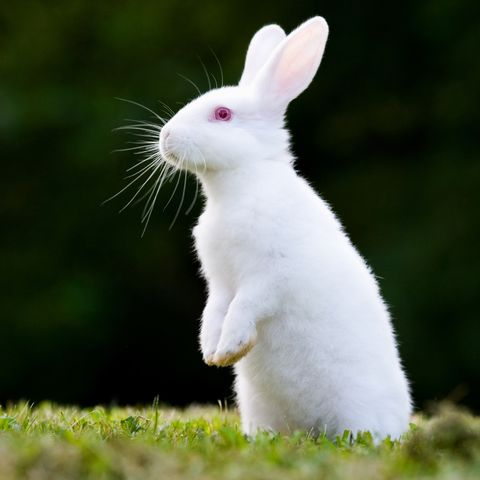



In [ ]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
# Setting of the Seaborn theme to darkgrid
sns.set_theme(context = 'notebook', style = 'darkgrid')

#### **2. Classification Model Architecture**

A model with the following architecture is proposed, based on the guidelines from Collet (2016):
1. A first Convolutional layer with 32 filters, a kernel size of (3, 3) and a ReLU activation function.
2. A first Max Pooling layer matrix size of (2, 2).
3. A second Convolutional layer with 32 filters, a kernel size of (3, 3) and a ReLU activation function.
4. A second Max Pooling layer matrix size of (2, 2).
5. A third Convolutional layer with 64 filters, a kernel size of (3, 3) and a ReLU activation function.
5. A third Max Pooling layer matrix size of (2, 2).
6. A Flattening layer for converting the pooled matrices into linear vectors.
7. A full connection layer with 128 nodes and a ReLU activation function, and a dropout of 20%.
8. An output layer of 1 node and a sigmoid activation function.

In [ ]:
# Initialization of the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Convolution
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Convolution
classifier.add(Conv2D(filters = 64,kernel_size = (3, 3), activation = "relu"))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Flattening
classifier.add(Flatten())

# Full Connection
classifier.add(Dense(units = 128, activation = "relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compilation
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

#### **3. Data Augmentation**
An original training dataset of 200 pictures and 200 pictures of ducks was used. The pictures were retrieved from the internet. On the other hand, testing sets of 40 pictures were used by each category.

The dataset can be found
<a href="https://drive.google.com/drive/folders/10PTdJztG3Wb7-Ch21jNQ3ZayyLvWMWLp?usp=sharing"> here</a>.

In [ ]:
# Load and mount of the Drive helper
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting of the Image Generators for the training and testing sets
train_datagen = ImageDataGenerator(
                                  rotation_range = 180,
                                  rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,        
                                  fill_mode='nearest',
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  )

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 10

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Projects/RabbitDuckClassifier/dataset/training_set',
                                                    target_size = (64, 64),
                                                    batch_size = batch_size,                                                    
                                                    class_mode = 'binary'                                                 
                                                    )

testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Projects/RabbitDuckClassifier/dataset/testing_set',
                                                target_size = (64, 64),
                                                batch_size = batch_size,                                                
                                                class_mode = 'binary'                                                  
                                                )

Found 400 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


#### 4. **Model Fitting**

The model was fitted with the training dataset and then validated with the testing set.

In [ ]:
# Fitting of the model
n_epochs = 30

steps_per_epoch = len(training_set)
validation_steps = len(testing_set)

history = classifier.fit(training_set,
                        steps_per_epoch = steps_per_epoch,
                        epochs = n_epochs,
                        validation_data = testing_set,
                        validation_steps = validation_steps)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 [==============================] - 75s 2s/step - loss: 0.6861 - accuracy: 0.5475 - val_loss: 0.6481 - val_accuracy: 0.5875
Epoch 2/30
40/40 [==============================] - 21s 522ms/step - loss: 0.5873 - accuracy: 0.6875 - val_loss: 0.6432 - val_accuracy: 0.5875
Epoch 3/30
40/40 [==============================] - 23s 554ms/step - loss: 0.5950 - accuracy: 0.7125 - val_loss: 0.5806 - val_accuracy: 0.6250
Epoch 4/30
40/40 [==============================] - 19s 476ms/step - loss: 0.5889 - accuracy: 0.6850 - val_loss: 0.6688 - val_accuracy: 0.6125
Epoch 5/30
40/40 [==============================] - 17s 422ms/step - loss: 0.5627 - accuracy: 0.7025 - val_loss: 0.6690 - val_accuracy: 0.6625
Epoch 6/30
40/40 [==============================] - 23s 586ms/step - loss: 0.5949 - accuracy: 0.7100 - val_loss: 0.6719 - val_accuracy: 0.6125
Epoch 7/30
40/40 [==============================] - 17s 433ms/step - loss: 0.5237 - accuracy: 0.7275 - val_loss: 0.7668 - val_accuracy: 0.6125
Epoch 8/30
40

<ipython-input-14-5b1932d75aa1>:3: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot([i+1 for i in range(n_epochs)],history.history['accuracy'],'-o',c='k',lw=2,markersize=9, color = 'darkblue')


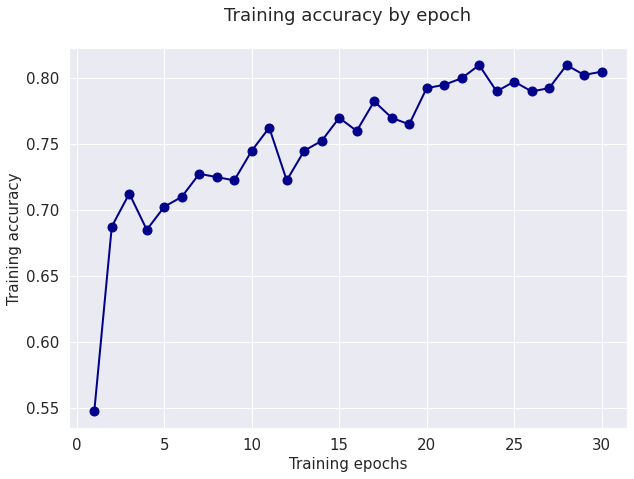

In [ ]:
# Training accuracy plot
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)],history.history['accuracy'],'-o',c='k',lw=2,markersize=9, color = 'darkblue')
plt.grid(True)
plt.title("Training accuracy by epoch\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The training accuracy curve raised from an initial value of 0.55 to a final value of about 0.80. The profile of the curve falls into the expectable and desirable for this case.

<ipython-input-15-f0808bb521a6>:3: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9, color = 'darkblue')


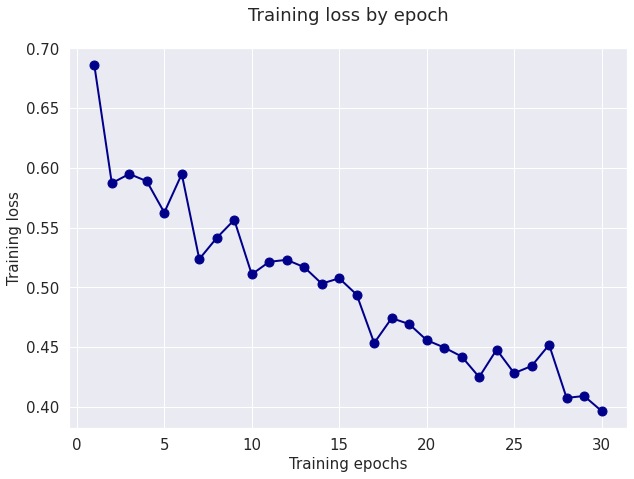

In [ ]:
# Training loss plot
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9, color = 'darkblue')
plt.grid(True)
plt.title("Training loss by epoch\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Likewise, the training loss decreased from an initial value of about 0.68 to a final value of 0.40.

<ipython-input-16-81863c179502>:3: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot([i+1 for i in range(n_epochs)],history.history['val_accuracy'],'-o',c='k',lw=2,markersize=9, color = 'darkgreen')


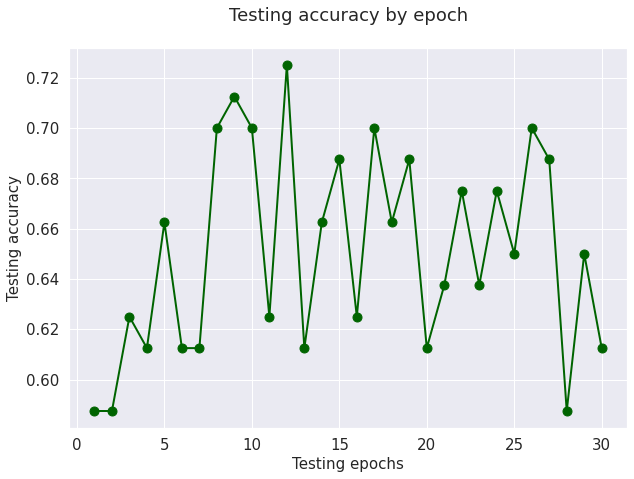

In [ ]:
# Testing accuracy plot
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)],history.history['val_accuracy'],'-o',c='k',lw=2,markersize=9, color = 'darkgreen')
plt.grid(True)
plt.title("Testing accuracy by epoch\n",fontsize=18)
plt.xlabel("Testing epochs",fontsize=15)
plt.ylabel("Testing accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Unlike the training accuracy plot, the testing accuracy beahvior by epoch is erratic and follow no distintive trend. This might suggest two issues: The testing set is too small and the fitted model is incapable of provide generalizable results, which render the model as a bad model.

<ipython-input-17-76032da37386>:3: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot([i+1 for i in range(n_epochs)],history.history['val_loss'],'-o',c='k',lw=2,markersize=9, color = 'darkgreen')


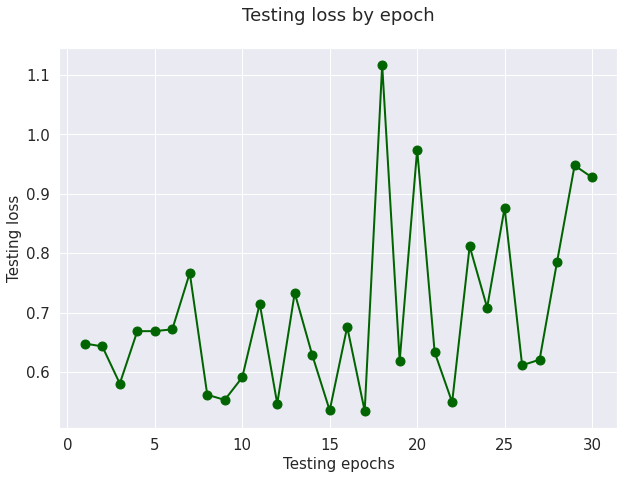

In [ ]:
# Testing loss plot
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)],history.history['val_loss'],'-o',c='k',lw=2,markersize=9, color = 'darkgreen')
plt.grid(True)
plt.title("Testing loss by epoch\n",fontsize=18)
plt.xlabel("Testing epochs",fontsize=15)
plt.ylabel("Testing loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

As expectable from the testing accuracy plot, the testing loss by epoch is erratic and even ends with a higher loss in comparison with the begining loss, which of course means that the fitted model is useless.

#### **5. Model Testing**

This is the fun part. Besides the issues with the model, a couple of different images resembling rabbits and ducks were pass down to the model to see if it was capable to accurately classify the object.

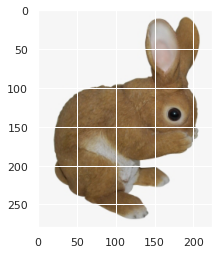

1/1 [==============================] - 0s 26ms/step


array([[1.]], dtype=float32)

In [ ]:
img_rabbit=Image.open('/content/drive/MyDrive/Projects/RabbitDuckClassifier/dataset/image_test/rabbit.jpeg')
plt.imshow(img_rabbit)
plt.show()
img_rabbit = img_rabbit.resize((64,64))
img_rabbit=np.expand_dims(img_rabbit,axis=0)
classifier.predict(img_rabbit)

According to the model, the rabbit figure is a **rabbit**.

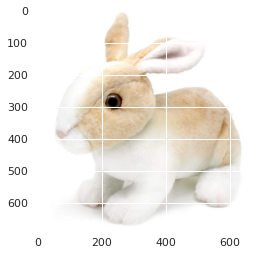

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

In [ ]:
img_stuffed_rabbit=Image.open('/content/drive/MyDrive/Projects/RabbitDuckClassifier/dataset/image_test/stuffed_rabbit.jpg')
plt.imshow(img_stuffed_rabbit)
plt.show()
img_stuffed_rabbit = img_stuffed_rabbit.resize((64,64))
img_stuffed_rabbit=np.expand_dims(img_stuffed_rabbit,axis=0)
classifier.predict(img_stuffed_rabbit)

According to the model, the stuffed toy is a **rabbit**.

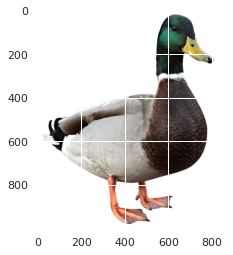

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)

In [ ]:
img_duck=Image.open('/content/drive/MyDrive/Projects/RabbitDuckClassifier/dataset/image_test/duck.jpg')
plt.imshow(img_duck)
plt.show()
img_duck = img_duck.resize((64,64))
img_duck=np.expand_dims(img_duck,axis=0)
classifier.predict(img_duck)

According to the model, the duck is a **duck**.

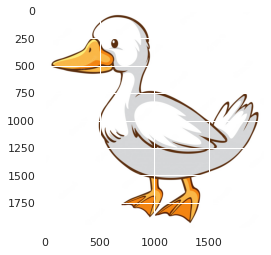

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)

In [ ]:
img_duck_drawing=Image.open('/content/drive/MyDrive/Projects/RabbitDuckClassifier/dataset/image_test/duck-drawing.jpg')
plt.imshow(img_duck_drawing)
plt.show()
img_duck_drawing = img_duck_drawing.resize((64,64))
img_duck_drawing=np.expand_dims(img_duck_drawing,axis=0)
classifier.predict(img_duck_drawing)

According to the model, the duck drawing is a **duck**.

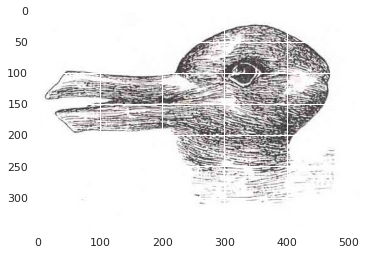

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

In [ ]:
img_illusion=Image.open('/content/drive/MyDrive/Projects/RabbitDuckClassifier/dataset/image_test/duck-rabbit.jpg')
plt.imshow(img_illusion)
plt.show()
img_illusion = img_illusion.resize((64,64))
img_illusion=np.expand_dims(img_illusion,axis=0)
classifier.predict(img_illusion)

According to the model, the famous rabbit-duck illusion (which actually inspired this whole project) more a **rabbit** than a duck.

#### **6. Conclusions**

A rabbit/duck classifier was built using convolutional neural networks in Keras and Tensorflow. And, despite the bad results obtained with the testing accuracy and loss metrics, the model was able to correctly classify some pictures of rabbits and ducks. 

The result is positive taking into account the extremely small dataset used for training the model with only 200 pictures by category.

Notwithstanding the above, it is noteworthy that the difference between training and testing accuracy was of about 0.20, which strongly suggests that overfitting might have ocurred within the model. 

Thus, in order to provide generalizability and accurate predictions, it is advisable to train the model with a larger dataset, such as one with 2000-5000 images; as well as using a larger testing dataset such as one with 1000 images to get a more accurate evaluation of the performance of the model.

#### **7. References**

* **Collet, F. (2016).** *Building powerful image classification models using very little data*. https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
* **Sarkar, T. (2019).** *Keras utility methods for streamlining training of convolutional neural net*. https://github.com/tirthajyoti/Deep-learning-with-Python/blob/master/Notebooks/Keras_flow_from_directory.ipynb

In [ ]:
# End